In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import CubicSpline
from IPython.display import display, Math

In [2]:
# Constantes do problema
D = 3e-2
h = 3e-2
d = 4e-2
g = 0.5e-2
N = 1500
m0 = 4*np.pi*1e-7
M = 2   # mass

# Amostragens da curva característica do mateiral BxH
H=np.array([-50,-49,-48,
            -47,-46,-45,
            -42.5,-40,-35,
            -30,-25,-20,
            -15,-10,-5,0])*1e3

B=np.array([0.1,0.26,0.52,
            0.71,0.79,0.83,
            0.92,0.965,1.02,
            1.07,1.1,1.125,
            1.15,1.17,1.19,1.2])

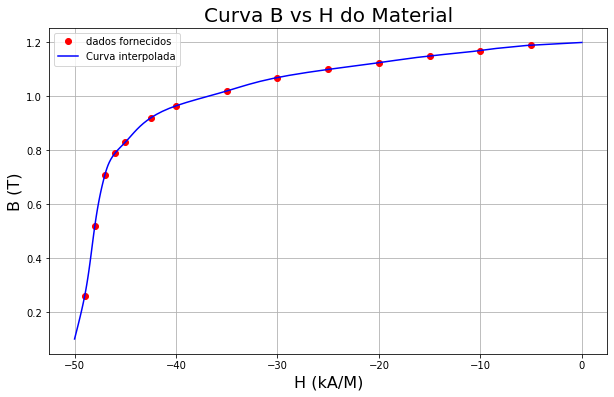

In [3]:
# cálculando uma equação para H e função de B

f=CubicSpline (B,H, bc_type='natural')

#organizando figura para verificar a superposição entre a função e os dados
#experimentais 
B_a=np.linspace(0.1,1.2,100)
H_a=f(B_a)

fig, ax=plt.subplots(figsize=(10,6))
ax.plot(H[1:15]*1e-3,B[1:15],'ro') #o ponto [0,0] foi retirado pra não atrapalhar o plot monolog
ax.plot(H_a*1e-3,B_a,'b')
ax.legend(['dados fornecidos','Curva interpolada'])

plt.title('Curva B vs H do Material',fontsize=20)
plt.xlabel('H (kA/M)',fontsize=16)
plt.ylabel('B (T)',fontsize=16)

plt.grid(True)

Text(0, 0.5, 'Bg(T)')

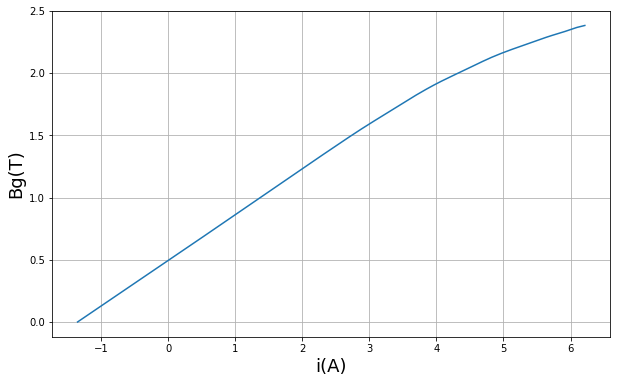

In [4]:
points = 150

BI = []
Ib = []

for i in range(points):
    BI.append((1.2/points)*i) # B de 0 a 1.2
    Ib.append((f(BI[i])*d + 2*BI[i]*g/m0)/N)

BG = 2*np.array(BI)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(Ib,BG)
plt.xlabel('i(A)',fontsize=18)
plt.ylabel('Bg(T)',fontsize=18)

In [5]:
points = 200 ## number of points
x = np.linspace(0, 0.9999*h, points)
BI2 = np.linspace(0, 1.2, points)
wc = np.zeros(2)
Fc = np.zeros(points)
step = 3e-2/points
Ibnor = 4.88824697243742

for k in range(points):
    for j in range(2):
        gi = g + step*j
        Lmbd2 = []
        Ib2 = []
        for i in range(points):
            Ib2.append((f(BI2[i])*d + gi*h*BI2[i]/(m0*(h-abs(x[k]))))/N)
            Lmbd2.append(BI2[i]*h*D*N)

        f2 = CubicSpline (Ib2,Lmbd2, bc_type='natural')
        I_Int = np.linspace(0, Ibnor, points)
        Lmbd_Int = f2(I_Int)
        wc[j] = integrate.trapezoid(Lmbd_Int, I_Int)  # Co-energy
    Fc[k] = abs(wc[0]-wc[1])/step
    
f3 = CubicSpline (x,Fc, bc_type='natural')

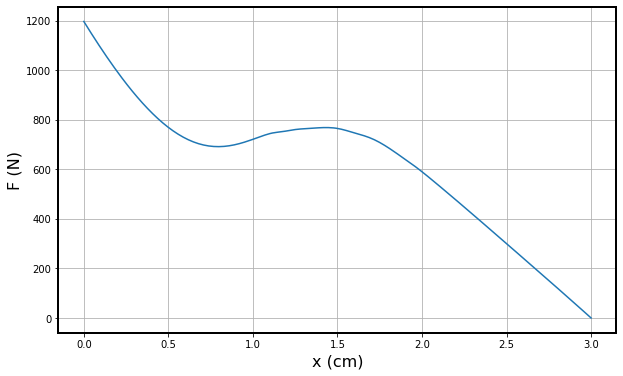

In [6]:
figure = plt.figure(figsize=(10,6))
plt.rc('axes', linewidth=2)
plt.plot(100*x, abs(f3(x)))
plt.xlabel('x (cm)',fontsize=16)
plt.ylabel('F (N)',fontsize=16)
plt.grid(True)

Text(0, 0.5, 'F (N)')

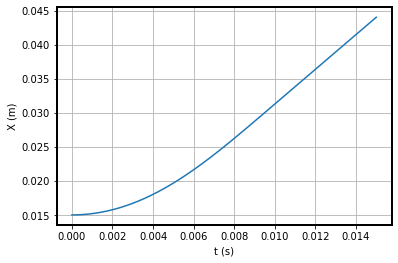

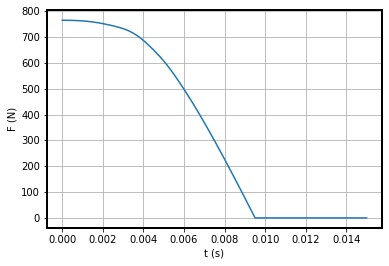

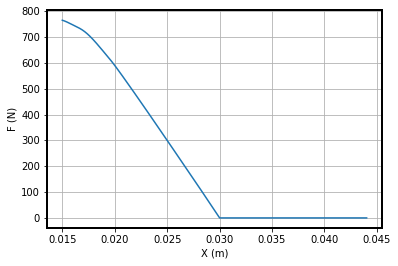

In [7]:
nTempo = 1500
time = np.linspace(0, (1.5e-2), nTempo)
timePass = 1.5e-2/(nTempo-1) # passo do tempo
x = h/2 # x inicial
v = 0 # velocidade inicial
F = f3(x) # força inicial

ForcaF = np.zeros(nTempo+1) # array com os valores da força ao longo do tempo
xF = np.zeros(nTempo+1) # array do x no tempo
ForcaF[0] = F
xF[0] = x
cont = 1

for t in time:
  x = v*timePass + x # x = dx + x0
  a = F/M
  v = a*timePass + v # v = dv + v0
  if x < h:
    F = f3(x) # a força só existe quando x<h
  else:
    F = 0
  ForcaF[cont] = F
  xF[cont] = x
  cont = cont + 1
  
time = np.linspace(0, (1.5e-2)+timePass, nTempo+1)
plt.figure()
plt.plot(time, xF)
plt.grid(True)
plt.xlabel('t (s)')
plt.ylabel('X (m)')

plt.figure()
plt.plot(time, ForcaF)
plt.grid(True)
plt.xlabel('t (s)')
plt.ylabel('F (N)')

plt.figure()
plt.plot(xF, ForcaF)
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('F (N)')

## Resultado alternativo

### b)

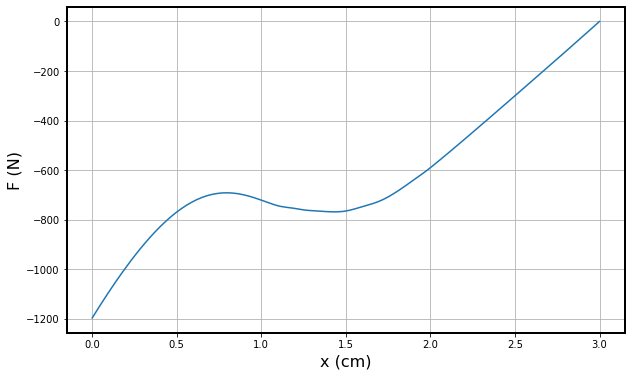

In [8]:
x = np.linspace(0, 0.9999*h, points)
f4 = CubicSpline (x,-f3(x), bc_type='natural')

figure = plt.figure(figsize=(10,6))
plt.rc('axes', linewidth=2)
plt.plot(100*x, f4(x))
plt.xlabel('x (cm)',fontsize=16)
plt.ylabel('F (N)',fontsize=16)
plt.grid(True)

### c)

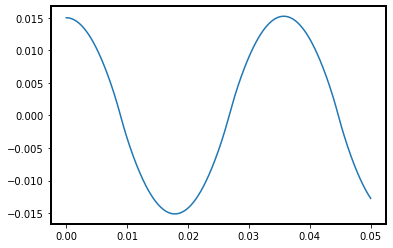

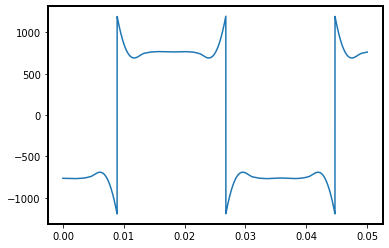

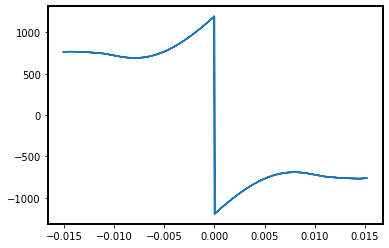

In [9]:
nTempo = 5000
time = np.linspace(0, (5e-2), nTempo)
timePass = 5e-2/(nTempo-1) # passo do tempo
x = h/2 # x inicial
v = 0 # velocidade inicial
F = f4(x) # força inicial

ForcaF = np.zeros(nTempo+1) # array com os valores da força ao longo do tempo
xF = np.zeros(nTempo+1) # array do x no tempo
ForcaF[0] = F
xF[0] = x
cont = 1

for t in time:
  x = v*timePass + x
  a = F/M
  v = a*timePass + v
  if x < 0:
    F = f3(-x) # A força será positiva para x negativo...
  else:
    F = f4(x) # e negativa para x positivo.

  ForcaF[cont] = F
  xF[cont] = x
  cont = cont + 1
  
time = np.linspace(0, (5e-2)+timePass, nTempo+1)
plt.figure()
plt.plot(time, xF)
plt.figure()
plt.plot(time, ForcaF)
plt.figure()
plt.plot(xF, ForcaF)

## Correção letra b e c (15/11)

In [10]:
points = 200 ## number of points
x = np.linspace(0, 0.9999*h, points)
BI2 = np.linspace(0, 1.2, points)
wc = np.zeros(2)
Fc = np.zeros(points)
step = 3e-2/points
stepx = h/points
Ibnor = 4.88824697243742

for k in range(points):
    for j in range(2):
        #gi = g + step*j
        xi = stepx*j
        Lmbd2 = []
        Ib2 = []
        for i in range(points):
            Ib2.append((f(BI2[i])*d + g*h*BI2[i]/(m0*(h-abs(x[k]-xi))))/N)
            Lmbd2.append(BI2[i]*h*D*N)

        f2 = CubicSpline (Ib2,Lmbd2, bc_type='natural')
        I_Int = np.linspace(0, Ibnor, points)
        Lmbd_Int = f2(I_Int)
        wc[j] = integrate.trapezoid(Lmbd_Int, I_Int)  # Co-energy
    Fc[k] = abs(wc[0]-wc[1])/step
    
f3 = CubicSpline (x,Fc, bc_type='natural')

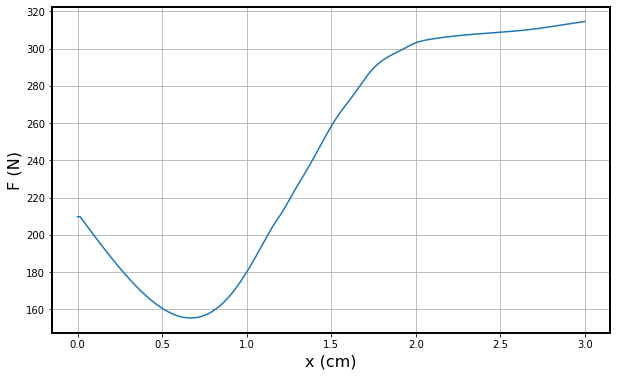

In [11]:
figure = plt.figure(figsize=(10,6))
plt.rc('axes', linewidth=2)
plt.plot(100*x, abs(f3(x)))
plt.xlabel('x (cm)',fontsize=16)
plt.ylabel('F (N)',fontsize=16)
plt.grid(True)

Text(0, 0.5, 'F (N)')

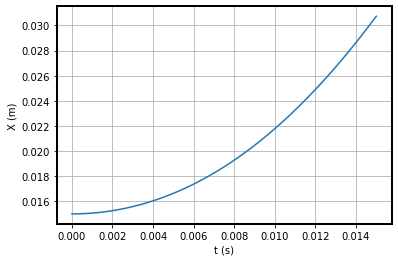

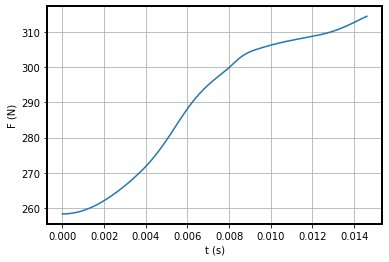

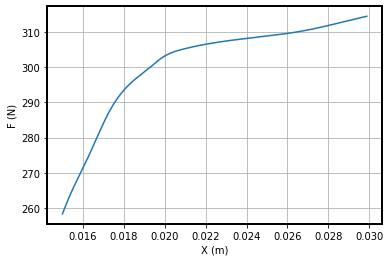

In [13]:
nTempo = 1500
time = np.linspace(0, (1.5e-2), nTempo)
timePass = 1.5e-2/(nTempo-1) # passo do tempo
x = h/2 # x inicial
v = 0 # velocidade inicial
F = f3(x) # força inicial

ForcaF = np.zeros(nTempo+1) # array com os valores da força ao longo do tempo
xF = np.zeros(nTempo+1) # array do x no tempo
ForcaF[0] = F
xF[0] = x
cont = 1

for t in time:
  x = v*timePass + x # x = dx + x0
  a = F/M
  v = a*timePass + v # v = dv + v0
  if x < h:
    F = f3(x) # a força só existe quando x<h
  else:
    F = 0
  ForcaF[cont] = F
  xF[cont] = x
  cont = cont + 1
  
time = np.linspace(0, (1.5e-2)+timePass, nTempo+1)
plt.figure()
plt.plot(time, xF)
plt.grid(True)
plt.xlabel('t (s)')
plt.ylabel('X (m)')

plt.figure()
plt.plot(time[:-40], ForcaF[:-40])
plt.grid(True)
plt.xlabel('t (s)')
plt.ylabel('F (N)')

plt.figure()
plt.plot(xF[:-40], ForcaF[:-40])
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('F (N)')

Text(0, 0.5, 'F (N)')

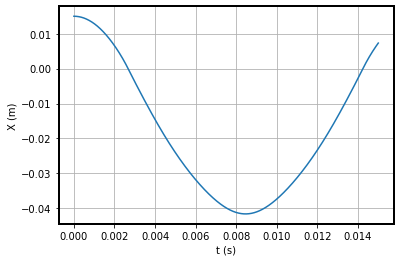

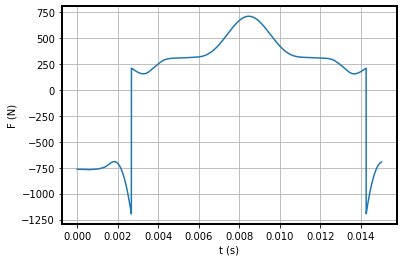

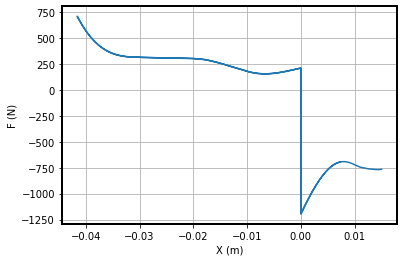

In [16]:
nTempo = 5000
time = np.linspace(0, (5e-2), nTempo)
timePass = 5e-2/(nTempo-1) # passo do tempo
x = h/2 # x inicial
v = 0 # velocidade inicial
F = f4(x) # força inicial

ForcaF = np.zeros(nTempo+1) # array com os valores da força ao longo do tempo
xF = np.zeros(nTempo+1) # array do x no tempo
ForcaF[0] = F
xF[0] = x
cont = 1

for t in time:
  x = v*timePass + x
  a = F/M
  v = a*timePass + v
  if x < 0:
    F = f3(-x) # A força será positiva para x negativo...
  else:
    F = f4(x) # e negativa para x positivo.

  ForcaF[cont] = F
  xF[cont] = x
  cont = cont + 1
  
time = np.linspace(0, (1.5e-2)+timePass, nTempo+1)
plt.figure()
plt.plot(time, xF)
plt.grid(True)
plt.xlabel('t (s)')
plt.ylabel('X (m)')

plt.figure()
plt.plot(time, ForcaF)
plt.grid(True)
plt.xlabel('t (s)')
plt.ylabel('F (N)')

plt.figure()
plt.plot(xF, ForcaF)
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('F (N)')